# Distribucion Chi cuadrado

Tambien es conocida como la distribucion de Pearson y es una distribucion continua, dependiente de un unico parametro $k$ que representa los grados de libertad.

Esta distribucion es similar a la normal de la siguiente manera: Si una variable aleatoria $X$ tiene una distribucion normal ($X\in N(0,1)$), entonces $X^2$ tiene una distribucion  chi cuadrado, con un grado de libertad    ($X^2\in \chi_1^2$). La suma de cuadrados de n variables aleatorias normales independientes y estándar tiene una distribución de chi cuadrado con n grados de libertad:

$$\sum_{i=1}^{n}X_i^2\;\in\; \chi_n^2$$

_"La distribución $\chi^2$ tiene muchas aplicaciones en inferencia estadística. La más conocida es la denominada prueba $\chi^2$, utilizada como prueba de independencia y como prueba de buen ajuste y en la estimación de varianzas. Pero también está involucrada en el problema de estimar la media de una población normalmente distribuida y en el problema de estimar la pendiente de una recta de regresión lineal, a través de su papel en la distribución t de Student."_

Tomado de: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2

<span class="mark">Ejemplo de aplicacion:</span>

Se ordena a un productor de píldoras que entregue píldoras con una desviación estándar de $\sigma=0.05$.

Del siguiente lote de píldoras $n=13$ muestras aleatorias tienen un peso de:

    3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.10, 3.02 g.
    
¿Es la desviación estándar mayor de lo permitido?

Dado que la distribución de chi-cuadrado describe la distribución de los cuadrados sumados de las variables aleatorias de una distribución normal estándar, tenemos que normalizar nuestros datos antes de calcular el valor de CDF correspondiente:

$$ SF_{\chi^2_{n-1}} = 1-CDF_{\chi_{n-1}^2}\Big(\sum \big(\frac{x-\bar{x}}{\sigma}\big)^2\Big) = 0.1929$$

Si el lote de píldoras es de una distribución con una desviación estándar de $\sigma = 0.05$, la probabilidad de obtener un valor de chi-cuadrado tan grande o mayor que el observado es de aproximadamente del $19\%$, por lo que no es atípico. En otras palabras, el lote coincide con la desviación estándar esperada.

In [6]:
import numpy as np
from scipy import stats

data = np.array([3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.10, 3.02])
sigma = 0.05
vaca = stats.chi2(len(data)-1)
statistic = sum( ((data-np.mean(data))/sigma)**2 )
chi2Dist.sf(statistic)

NameError: name 'chi2Dist' is not defined

In [ ]:
np.std(data, ddof = 1)

# Distribucion normal

Vamos a retomar la distribucion normal debido a su gran importancia en el analisis estadistico. Recordar que es una distribucion de variable continua, y que debido al teorema del limite central y de los grandes numeros, toda distribucion tendera a ser normal cuando se toman muestras cada vez mas grandes. 

1. Muchos fenómenos que podemos medir tanto en las ciencias exactas como las sociales de asemejan en su frecuencia a esta distribución.
2. La distribución normal tiene ciertas propiedades matemáticas que nos permiten predecir qué proporción de la población (estadística) caerá dentro de cierto rango si la variable tiene distribución normal.
3. Varios tests de significanza de diferencia entre conjuntos de datos presumen que los datos del conjunto tiene una distribución normal.

Recordar que su forma es:

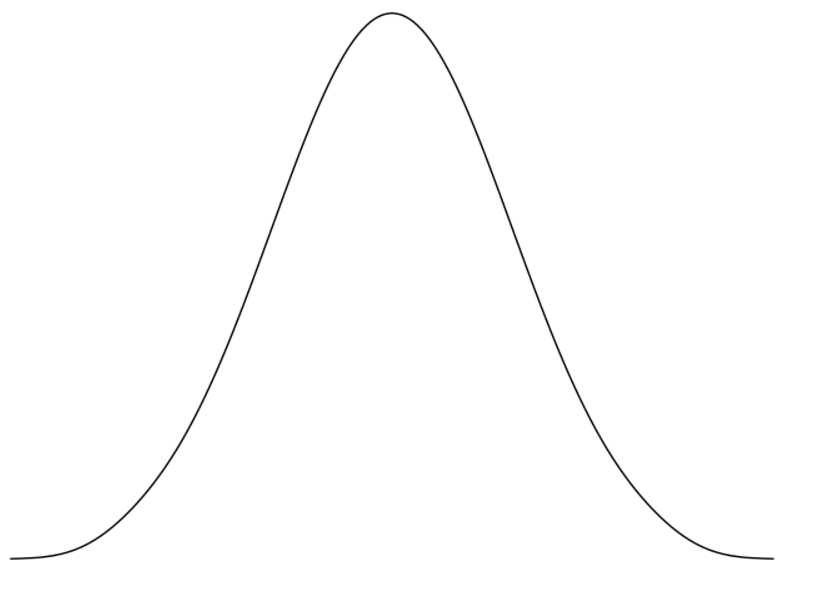

Dentro de sus caracteristicas esta el que la media, la mediana y la moda coinciden en la valor central.

La curva normal depende de dos parametros, la media y la desviacion estandar $\mu$ y $\sigma$. $\mu$ nos da la ubicacion del pico central de la curva y por lo tanto se conoce como parametro de ubicacion; $\sigma$ nos habla de la dispersion de los datos alrededor del pico y por lo tanto se conoce como parametro de escala. Dicho de otra forma, $\sigma$ nos permite conocer la forma de la campana, de tal forma que su apertura se puede cuantificar en terminos de sigmas:

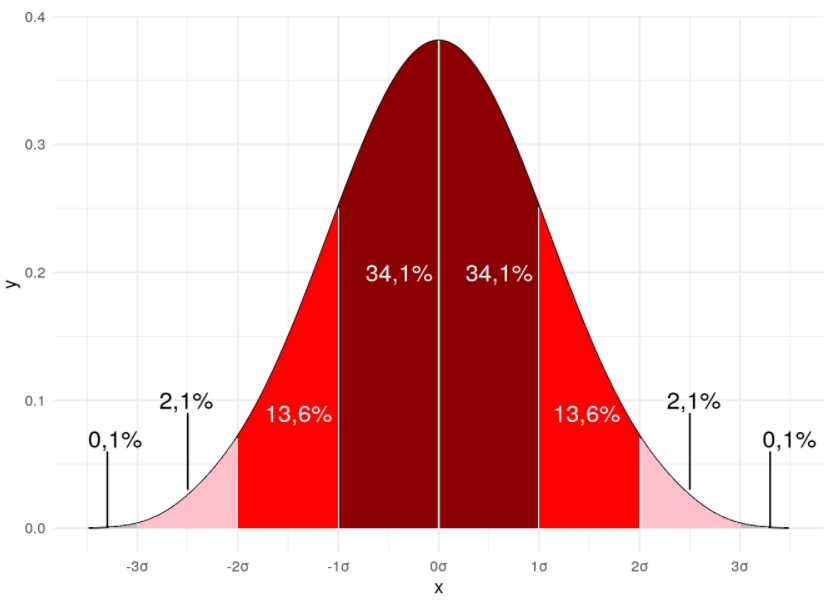

## Variables normalizadas

Uno de los procesos mas frecuentes cuando se realiza analisis de datos entre varias variables distintas es el de la normalizacion; este proceso permite que dos variables que en principio son de escala muy diferente, y por lo tanto no comparables, asuman escalas similares y se vuelvan comparables. Este proceso es muy importante cuando se analizan fenomenos de varias variables, pues de lo contrario nuestro analisis no sera el mas adecuado. 

La normalizacion es un proceso que nos permite replantear los datos en escala diferente sin cambiar su significado; es similar a tomar $1km$ y convertirlo a $1000m$. Sigue siendo la misma cantidad pero en escala diferente.

Resulta que la distribucion normal se puede normalizar, de tal forma que quede en terminos de unidades de $\sigma$, lo que permite que quede con valores definidos de $\mu = 0$ y $\sigma = 1$. La variable normalizada (estandarizada) se denomina _Z-score_ y se calcula como:

$$z = \frac{x-\bar{x}}{\sigma}$$

siendo $z$ la variable normalizada, $x$ es una observacion de $X$, $\bar{x}$ es la media de las observaciones y $\sigma$ o $s$ es la desviacion estandar de la poblacion o muestra, respectivamente.

Normalizar las variables nos permite comparar su distribución independientemente de su unidad de cuenta y amplitud, también nos permite sacar conclusiones sobre probabilidades y proporciones.

**Ejemplo 4.1 (Analizando datos del ministerio de salud)**

En el 2007 el Ministerio de Salud de Argentina realizó un estudio (ENNyS 2007) que entre otras recopiló datos sobre la estatura de las argentinas entre 19 y 49 años. La media fue de 161,01 centímetros con una desviación estándar de 6,99. Con estos datos podemos construir nuestra curva.

In [3]:
from scipy import stats
mu = 161.01
sigma = 6.99
normal = stats.norm(mu, sigma)
x = normal.rvs(size = 1000)
x = np.sort(x)
y = normal.pdf(x)

<IPython.core.display.Javascript object>


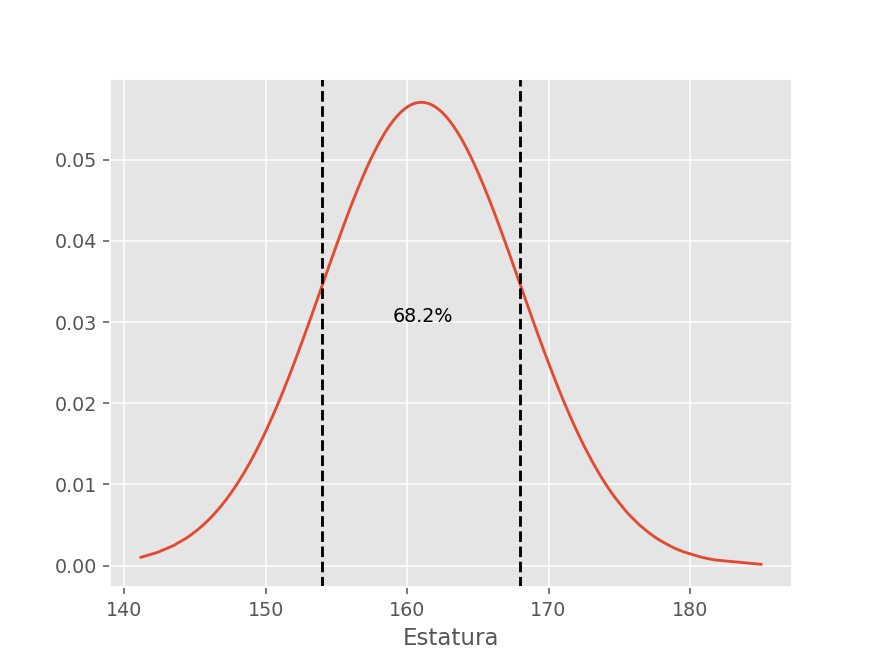

Text(159.01, 0.03, '68.2%')

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_xlabel('Estatura')
plt.axvline(mu-sigma, ymin = 0, ymax=1, c = 'k', linestyle ='--')
plt.axvline(mu+sigma, ymin = 0, ymax=1, c = 'k', linestyle ='--')
ax.annotate('68.2%', xy=[mu-2, 0.03])

In [7]:
print(f'El 68.2% de las argentinas esta entre {mu - sigma} cm y {mu + sigma} cm.')

El 68.2% de las argentinas esta entre 154.01999999999998 cm y 168.0 cm.


<span class="burk">Ejercicio</span> **¿Qué proporción de la población femenina mide más que 175 centímetros?**

In [8]:
print(f' El {round(normal.sf(175)*100, 2)}%')

 El 2.27%


Ahora haremos el mismo ejericicio pero con la variable normalizada.


In [9]:
from scipy import stats
normal = stats.norm()
x = normal.rvs(size = 1000)
x = np.sort(x)
y = normal.pdf(x)

<IPython.core.display.Javascript object>


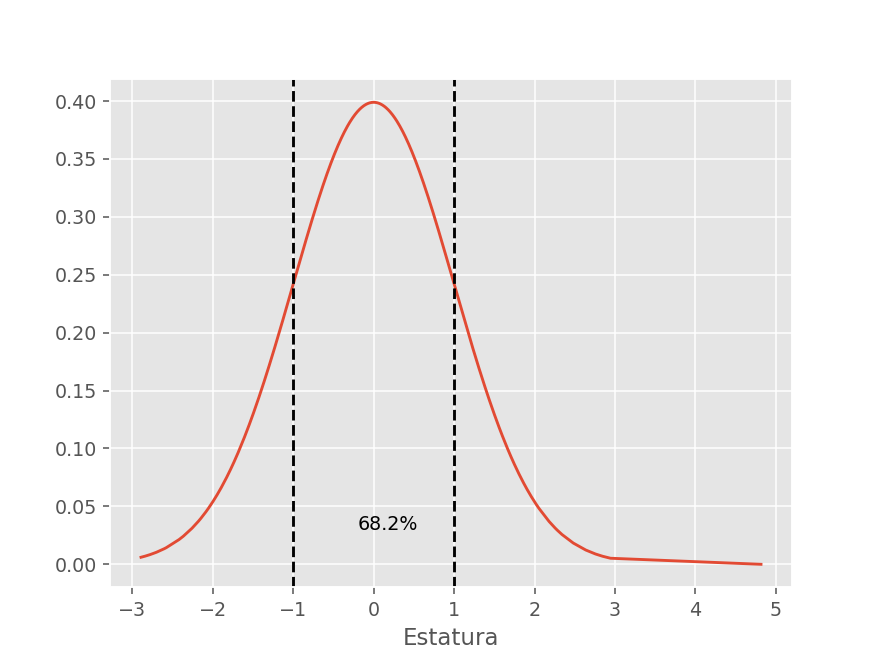

Text(-0.2, 0.03, '68.2%')

In [13]:
mu = 0
sigma = 1
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_xlabel('Estatura')
plt.axvline(mu-sigma, ymin = 0, ymax=1, c = 'k', linestyle ='--')
plt.axvline(mu+sigma, ymin = 0, ymax=1, c = 'k', linestyle ='--')
ax.annotate('68.2%', xy=[mu-0.2, 0.03])

<span class="burk">Ejercicio</span> **¿Qué proporción de la población femenina mide menos que 150 centímetros, usando una distribucion normalizada?**

In [15]:
z = (150-161.01)/6.99
z

-1.5751072961373378

In [17]:
normal.cdf(z)*100

5.7615840111279075

# Error estandar e intervalos de confianza

Recordemos que el error estandar representa la desviacion estandar de las medias muestrales y se calcula como

$SE = \frac{\sigma}{\sqrt{N}}\;$ o tambien como $\;SE = \frac{s}{\sqrt{N}}$

Este concepto nos permite definir el concepto _intervalo de confianza_ de la siguiente manera:

$$IC = \bar{x} \pm (1.96*SE)$$

EL 1.96 proviene del calculo de la variable normalizada $z$ y garantiza que para cualquier distribucion normal, el $IC$ contiene al 95% de los datos. Por otro lado, tambien se puede definir que 

$$IC = \bar{x} \pm (2.58*SE)$$

contiene al 99% de los datos.

<span class="burk">EJERCICIO</span>

Para la estatura de las argentinas entre 19 y 49 en 2007. Si sacamos una muestra aleatoria de esta población de tan solo 30 observaciones obtenemos:

Muestra = {163, 171, 171, 167, 164, 160, 153, 176, 162, 171, 166, 164, 169, 160, 151, 155, 156, 147, 162, 170, 164, 160, 158, 159, 157, 159, 156, 162, 159, 174}

Calcular los siguientes intervalos de confianza:

1. IC con un 68% de confianza
2. IC con un 95% de confianza
3. IC con un 99% de confianza

In [1]:
# Ejercicio 1
muestra = [163, 171, 171, 167, 164, 160, 153, 176, 162, 171, 166, 164, 169, 160, 151, 155, 156, 147, 162, 170, 164, 160, 158, 159, 157, 159, 156, 162, 159, 174]
prom = np.mean(muestra)
desv = np.std(muestra, ddof = 1)
print(f'IC: [{prom - desv}, {prom + desv}]')

IC: [155.30972699604973, 169.09027300395024]


In [3]:
# Ejercicio 2
from scipy import stats
se = stats.sem(muestra)
print(f'IC: [{prom - 1.96*se}, {prom + 1.96*se}]')

IC: [159.73434747160013, 164.66565252839985]


In [4]:
# Ejercicio 3
from scipy import stats
se = stats.sem(muestra)
print(f'IC: [{prom - 2.58*se}, {prom + 2.58*se}]')

IC: [158.9543961615961, 165.44560383840388]


# Tipico procedimiento de analisis

En el tema de analisis de dato estadisticos, generalmente se realiza el siguiente proceso:

Se visualizan los datos y se generan modelos que puedan explicar los datos. Luego, se determinan los parámetros de mejor ajuste para estos modelos y se verifican estos modelos, generalmente mirando los residuos. 
Si no se está satisfecho con los resultados, se modifica el modelo para mejorar la correspondencia entre modelos y datos; cuando se está satisfecho, se calculan los intervalos de confianza para los parámetros del modelo y se forma una interpretación basándose en estos valores.

En cualquier caso, uno debe comenzar con los siguientes pasos:

1. Inspeccionar visualmente los datos.
2. Encontrar muestras extremas y revísarlas con cuidado.
3. Determinar el tipo de datos de los valores.
4. Si los datos son continuos, comprobar si están distribuidos normalmente o no.
5. Seleccionar y aplicar la prueba adecuada, o comenzar con el análisis de los datos basado en modelos.

## Visualizacion de datos y busqueda de datos extremos

El primer paso en el análisis de datos es la inspección visual de los datos. Además de verificar si el primer y último valor de los datos se han leído correctamente, es recomendable verificar si faltan datos y si hay valores atípicos.

No existe una definición única para valores atípicos. Sin embargo, para las muestras distribuidas normalmente, a menudo se definen como datos que se encuentran en más de $1,5 * IQR$ (rango intercuartil), o más de dos desviaciones estándar, de la media de la muestra.

Los valores atípicos a menudo caen en uno de dos grupos: 

1. son causados por errores en el registro, en cuyo caso deben excluirse
2. constituyen puntos de datos muy importantes y valiosos, en cuyo caso deben incluirse en el análisis de datos.

Para decidir cuál de los dos es el caso, debe verificar los datos brutos subyacentes (en busca de saturación o valores de datos no válidos) y los protocolos de sus experimentos (en busca de errores que puedan haber ocurrido durante la grabación). Si un problema subyacente es detectado, entonces —y sólo entonces— se pueden eliminar los valores atípicos del análisis. En cualquier otro caso, los datos deben conservarse.

In [ ]:
z = (150-161.01)/(6.99)
z

In [ ]:
print(f'Es un {round(normal.cdf(z)*100, 2)}%')

## Evaluar la normalidad

Para hacer esto existen diferentes tests, algunos mas complicados que otros, sin embargo esos tests se basan en las caracteristicas que se mencionaron antes. Algunas de las pruebas que se pueden realizar son:

1. Sobreponer la distribucion en estudio con una distribucion normal y ver que tanto se diferencian.
2. Como sabemos que el 68.2% de los datos estan a una sigma de distancia del promedio, podemos verificar si esta condicion se cumple.

**Ejemplo:** Consideremos un grupo de personas a los cuales se les pregunto la edad, obteniendo lo siguiente:

    Edades: {15, 12, 11, 18, 15, 15, 9, 19, 14, 13, 11, 12, 18, 15, 16, 14, 16, 17, 15, 17, 13, 14, 13, 15, 17, 19, 17, 18, 16, 14}



In [3]:
x = np.array([15, 12, 11, 18, 15, 15, 9, 19, 14, 13, 11, 12, 18, 15, 16, 14, 16, 17, 15, 17, 13, 14, 13, 15, 17, 19, 17, 18, 16, 14])
mu = np.mean(x)
sigma = np.std(x, ddof = 1)

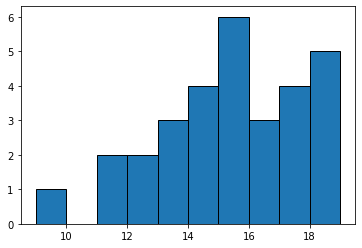

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(x, edgecolor = 'k');

Siendo mas formales, las pruebas de hipótesis estadísticas se pueden agrupar en pruebas paramétricas y pruebas no paramétricas. Las pruebas paramétricas asumen que los datos pueden describirse bien mediante una distribución definida por uno o más parámetros, en la mayoría de los casos por una distribución normal. Para el conjunto de datos dado, se determinan los parámetros de mejor ajuste para esta distribución, junto con sus intervalos de confianza, e interpretados.

Sin embargo, este enfoque solo funciona si el conjunto de datos dado está bien aproximado por la distribución elegida. De lo contrario, los resultados de la prueba paramétrica pueden ser completamente incorrectos. En ese caso, se deben utilizar pruebas no paramétricas que son menos sensibles, pero que por lo tanto no dependen de que los datos sigan una distribución específica.

**Usando probplots**

Calcula cuantiles para una gráfica de probabilidad y, opcionalmente, muestre la gráfica.

Genera un gráfico de probabilidad de datos de muestra contra los cuantiles de una distribución teórica específica (la distribución normal por defecto).
`probplot` calcula opcionalmente una línea de mejor ajuste para los datos y traza los resultados usando Matplotlib o una función de trazado determinada.

<IPython.core.display.Javascript object>


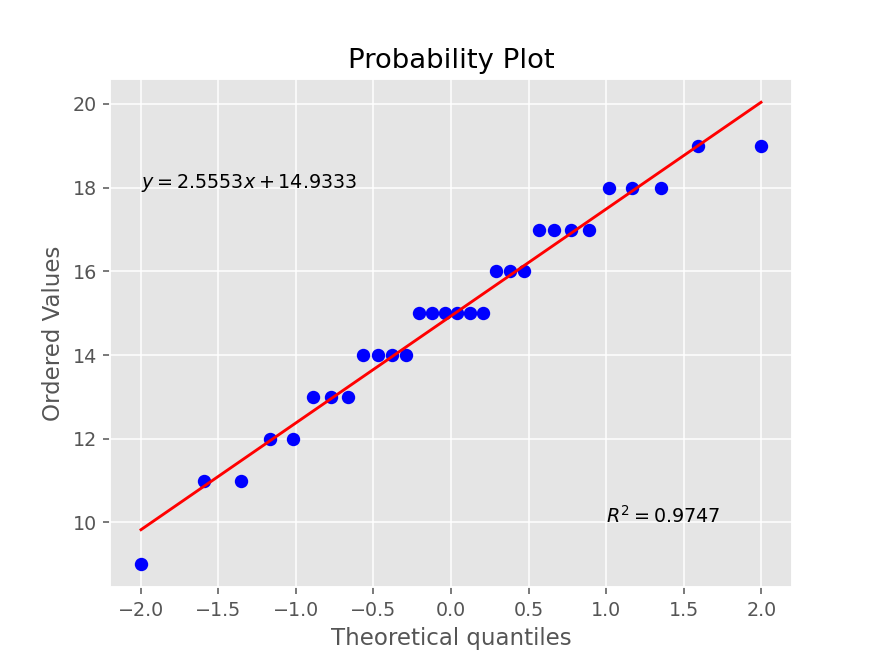

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([ 9, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15,
         15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19])),
 (2.555338143420654, 14.933333333333334, 0.987260812917855))

In [14]:
%matplotlib notebook
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.annotate(f'$R^2={np.round(0.987260812917855**2, 4)}$', xy = [1, 10])
ax.annotate(f'$y={np.round(2.555338143420654, 4)}x+{np.round(14.933333333333334, 4)}$', xy = [-2, 18])
stats.probplot(x, plot=plt)


**Usando tests de normalidad**

En las pruebas de normalidad, pueden surgir diferentes desafíos: a veces solo pueden estar disponibles pocas muestras, mientras que otras veces uno puede tener muchos datos, pero algunos valores extremadamente distantes. Para hacer frente a las diferentes situaciones se han desarrollado diferentes pruebas de normalidad. Estas pruebas para evaluar la normalidad (o la similitud con alguna distribución específica) se pueden dividir en dos categorías:

1. Pruebas basadas en la comparación ("mejor ajuste") con una distribución determinada, a menudo especificada en términos de su CDF. Algunos ejemplos son la prueba de Kolmogorov-Smirnov, la prueba de Lilliefors, la prueba de Anderson-Darling, el criterio de Cramer-von Mises, así como las pruebas de Shapiro-Wilk y Shapiro-Francia.
2. Pruebas basadas en estadística descriptiva de la muestra. Algunos ejemplos son la prueba de asimetría, la prueba de curtosis, la prueba ómnibus de D’Agostino-Pearson o la prueba de Jarque-Bera.

Para utilizar estos tests, es necesario fijar un nivel de significacncia para compararlo con el parametro llamado _p-value_. Si el p-value es mayor que el nivel de significancia, se acepta la hipotesis nula, que en este caso es que la distribucion de los datos es aproximadamente normal, de lo contrario se rechaza.

In [15]:
# Omnibus 0.05
stats.normaltest(x)

NormaltestResult(statistic=0.7470740898476492, pvalue=0.6882954879701331)

In [16]:
# Shapiro-Wilk test
stats.shapiro(x)

ShapiroResult(statistic=0.970319926738739, pvalue=0.547965407371521)

In [6]:
# Lilliefors-test
from statsmodels.stats.diagnostic import lilliefors
lilliefors(x, pvalmethod = 'approx')

(0.1106780167370579, 0.4518966490042074)

In [19]:
# Kolmogorov-Smirnov test
stats.kstest((x-np.mean(x))/np.std(x,ddof=1), 'norm')

KstestResult(statistic=0.1106780167370579, pvalue=0.81712157161558)

## Transformacion

Si los datos se desvían significativamente de una distribución normal, a veces es posible hacer que la distribución sea aproximadamente normal transformando los datos. Por ejemplo, para datos que a menudo tienen valores que solo pueden ser positivos (por ejemplo, el tamaño de las personas) y que tienen una cola positiva larga: estos datos a menudo se pueden normalizar aplicando una transformación logarítmica.

<span class="burk">**EJERCICIOS**</span>

1. Cree un conjunto aleatorio de 1000 datos a partir de una distribucion normal con media 0 y desv. est 3.
2. Grafique su conjunto de puntos usando un histograma.
3. Utilice probplots para verificar que los datos se ajusten a la normalidad.
4. Realice tests de D'Agostino-Pearson, Shapiro-Wilk, Lilliefors y Kolmogorov-Smirnov para comprobar la normalidad con el p-valor. Despliegue sus resultados en una tabla correctamente etiquetada.
5. Realice todo lo anterior para las distribuciones chi-cuadrado, binomial y poisson,

ShapiroResult(statistic=0.9988420009613037, pvalue=0.7817908525466919)

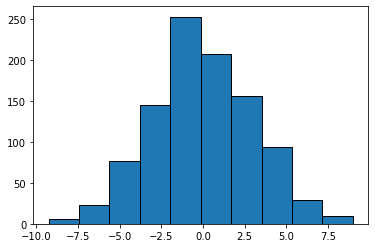

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
normal = stats.norm(0, 3)
x = normal.rvs(1000)
fig, ax = plt.subplots()
ax.hist(x, edgecolor = 'k')
stats.shapiro(x)

C:\Users\ccolo\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9855155348777771, pvalue=1.1314614609150614e-30)

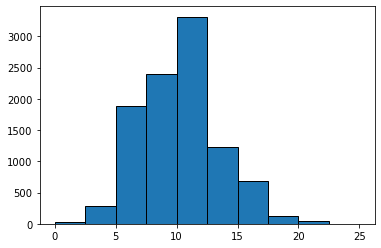

In [3]:
poisson = stats.poisson(10)
x = poisson.rvs(10000)
fig, ax = plt.subplots()
ax.hist(x, edgecolor = 'k')
stats.shapiro(x)

ShapiroResult(statistic=0.8769466280937195, pvalue=2.2206669445424698e-27)

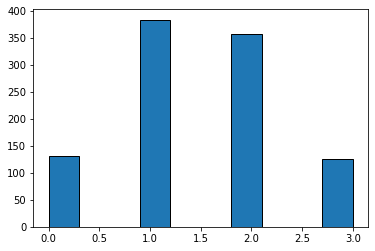

In [14]:
(n, p)=(3,0.5) 
binomial=stats.binom(n, p)
x = binomial.rvs(1000)
fig, ax = plt.subplots()
ax.hist(x, edgecolor = 'k')
stats.shapiro(x)


ShapiroResult(statistic=0.9547250270843506, pvalue=0.0017218024004250765)

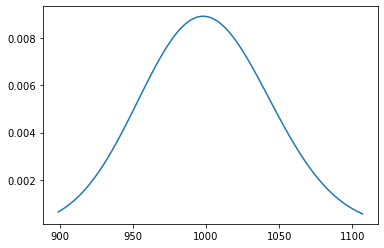

In [16]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n = 1000
x = np.linspace(chi2.ppf(0.01, n),chi2.ppf(0.99, n), 100)
ax.plot(x, chi2.pdf(x, n))
stats.shapiro(x)